# Mnist TF lite Model Trainin

source: [https://colab.research.google.com/github/tensorflow/examples/blob/master/lite/codelabs/digit_classifier/ml/step2_train_ml_model.ipynb]

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

print(tf.__version__)

2.7.0


Downloadin mnist dataset with keras api

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Normalizing

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print('Pixels are normalized')

Pixels are normalized


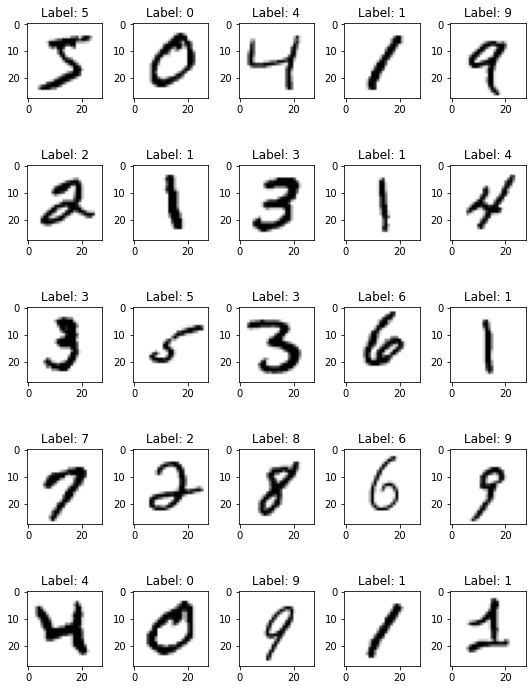

In [4]:
# Show the images


# define rows and columns count to show the images
num_rows = 5
num_cols = 5
cell_count = num_rows * num_cols

# get images and labels to show
images = train_images[0:cell_count]
labels = train_labels[0:cell_count]

# plot the images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5 * num_cols, 2 * num_rows))

for i in range(cell_count):
    ax = axes[i//num_cols, i % num_cols]
    ax.imshow(images[i], cmap=plt.cm.binary)
    ax.set_title("Label: {}".format(labels[i]))
plt.tight_layout()
plt.show()

# plt.figure(figsize=(10, 10))
# for i in range(25):
#     plt.subplot(5, 5, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(train_labels[i])
# plt.show()

In [5]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28)),
    keras.layers.Reshape(target_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(10),
])

# Define how to train model
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

model.summary()

Epoch 1/5
   1/1875 [..............................] - ETA: 5:01 - loss: 2.2996 - accuracy: 0.1562

2022-04-23 19:23:06.109992: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 28s 15ms/step - loss: 0.1419 - accuracy: 0.9571
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0533 - accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0381 - accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0299 - accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0237 - accuracy: 0.9927
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
             

In [6]:
# Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.0372 - accuracy: 0.9889
Test accuracy: 0.9889000058174133


In [7]:
# A helper function that return 'red'/'black' depending on if its two input parameter matches or not.
def get_label_color(val1, val2):
    if val1 == val2:
        return 'black'
    else:
        return 'red'

In [8]:
# Predict the labels of digit images in our test dataset.
predictions = model.predict(test_images)

In [9]:
# As the model output 10 float representing the probability of the input image being a digit from 0 to 9, we need to find the largest probability value
# to find out which digit the model predicts to be most likely in the image.
prediction_digits = np.argmax(predictions, axis=1)

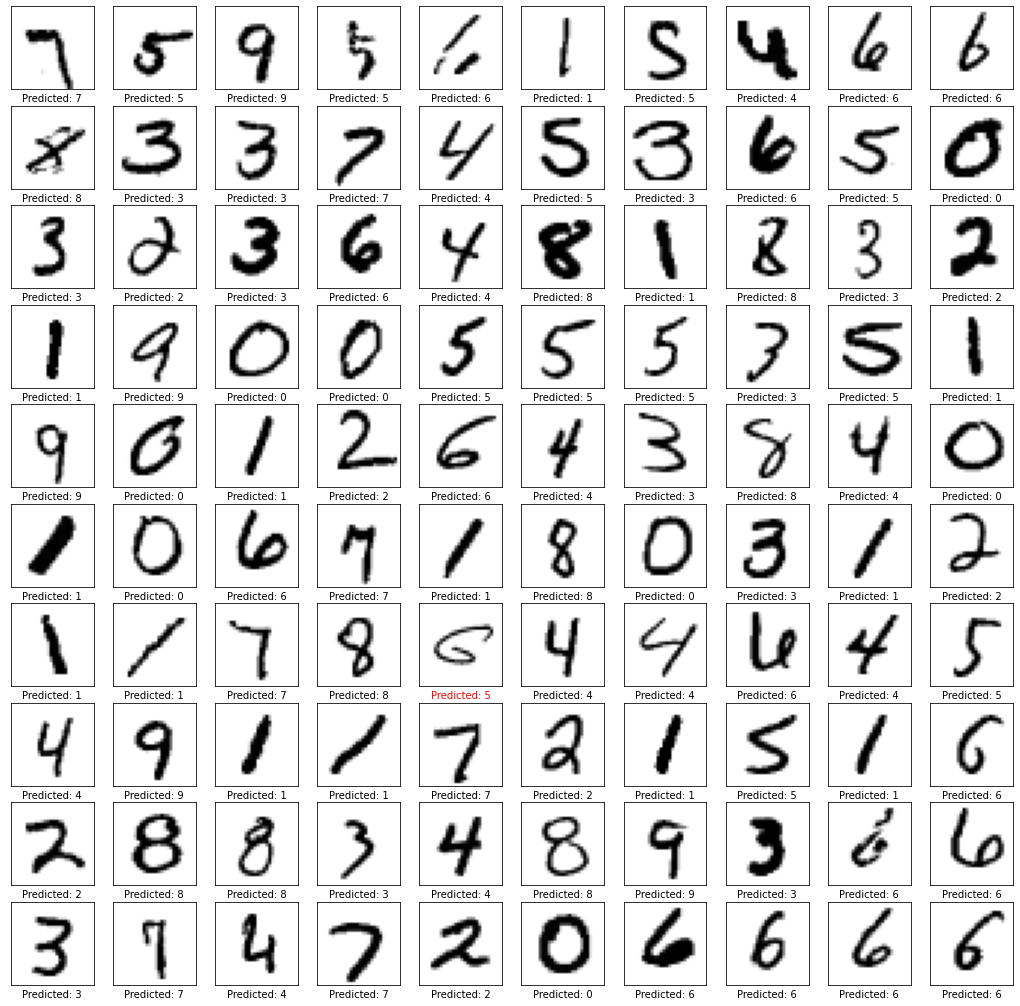

In [10]:
# Then plot 100 random test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(18,18))
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_index = random.randint(0, len(prediction_digits))
    plt.imshow(test_images[image_index], cmap=plt.cm.binary)
    ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index], test_labels[image_index]))
    plt.xlabel('Predicted: %d' % prediction_digits[image_index])
plt.show()



In [11]:
# Convert Keras model to TF Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

# Show model size in Kbs.
float_model_size = len(tflite_float_model) / 1024
print("Float model size = %dKbs." % float_model_size)

2022-04-23 19:25:29.519394: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /var/folders/mf/v9pj_1j153d91r3123ws4w2h0000gn/T/tmph9w8l_lv/assets


2022-04-23 19:25:29.921903: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2022-04-23 19:25:29.921918: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.


Float model size = 436Kbs.


2022-04-23 19:25:29.922031: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/mf/v9pj_1j153d91r3123ws4w2h0000gn/T/tmph9w8l_lv
2022-04-23 19:25:29.923036: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2022-04-23 19:25:29.923048: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /var/folders/mf/v9pj_1j153d91r3123ws4w2h0000gn/T/tmph9w8l_lv
2022-04-23 19:25:29.926503: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2022-04-23 19:25:29.952737: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /var/folders/mf/v9pj_1j153d91r3123ws4w2h0000gn/T/tmph9w8l_lv
2022-04-23 19:25:29.960164: I tensorflow/cc/saved_model/loader.cc:283] SavedModel load for tags { serve }; Status: success: OK. Took 38133 microseconds.
2022-04-23 19:25:29.972386: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:237] disabling MLIR cr

As we will deploy our model to a mobile device, we want our model to be as small and as fast as possible. Quantization is a common technique often used in on-device machine learning to shrink ML models. Here we will use 8-bit number to approximate our 32-bit weights, which in turn shrinks the model size by a factor of 4.

Quantization techniques: https://www.tensorflow.org/lite/performance/post_training_quantization

In [12]:
# Re-convert the model to TF Lite using quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

# Show model size in Kbs.
quant_model_size = len(tflite_quant_model) / 1024
print("Quantized model size = %dKbs." % quant_model_size)
print("which is about %d%% of the float model size." % (quant_model_size * 100 / float_model_size))

INFO:tensorflow:Assets written to: /var/folders/mf/v9pj_1j153d91r3123ws4w2h0000gn/T/tmp927b5zjt/assets


INFO:tensorflow:Assets written to: /var/folders/mf/v9pj_1j153d91r3123ws4w2h0000gn/T/tmp927b5zjt/assets
2022-04-23 19:25:30.632537: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.


Quantized model size = 114Kbs.
which is about 26% of the float model size.


2022-04-23 19:25:30.632569: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2022-04-23 19:25:30.632663: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/mf/v9pj_1j153d91r3123ws4w2h0000gn/T/tmp927b5zjt
2022-04-23 19:25:30.633387: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2022-04-23 19:25:30.633393: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /var/folders/mf/v9pj_1j153d91r3123ws4w2h0000gn/T/tmp927b5zjt
2022-04-23 19:25:30.636896: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2022-04-23 19:25:30.662280: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /var/folders/mf/v9pj_1j153d91r3123ws4w2h0000gn/T/tmp927b5zjt
2022-04-23 19:25:30.670806: I tensorflow/cc/saved_model/loader.cc:283] SavedModel load for tags { serve }; Status: success: OK. Too

In [13]:
# A helper function to evaluate the TF Lite model using "test" dataset.
def evaluate_tflite_model(tflite_model):
    # Initialize TFLite interpreter using the model
    interpreter = tf.lite.Interpreter(model_content=tflite_model)
    interpreter.allocate_tensors()
    input_tensor_index = interpreter.get_input_details()[0]['index']
    output = interpreter.tensor(interpreter.get_output_details()[0]['index'])

    # Run predictions on every image in the "test" dataset
    prediction_digits = []
    for test_image in test_images:
        # Pre-processing: add batch dimension and convert to float32 to match with the model's input data format.
        test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
        interpreter.set_tensor(input_tensor_index, test_image)

        # Run inference.
        interpreter.invoke()

        # Post-processing: remove batch dimension and find the digit with highest probability.
        digit = np.argmax(output()[0])
        prediction_digits.append(digit)

    # Compare prediction results with ground truth labels to calculate accuracy.
    accurate_count = 0
    for index in range(len(prediction_digits)):
        if prediction_digits[index] == test_labels[index]:
            accurate_count += 1
    accuracy = accurate_count * 1.0 / len(prediction_digits)
    
    return accuracy
    

# Evaluate the TF Lite float model. You'll find that its accurary is identical
# to the original TF (Keras) model because they are essentially the same model
# stored in different format.
float_accuracy = evaluate_tflite_model(tflite_float_model)
print('Float model accuracy = %.4f' % float_accuracy)

# Evalualte the TF Lite quantized model.
# Don't be surprised if you see quantized model accuracy is higher than
# the original float model. It happens sometimes :)
quantized_accuracy = evaluate_tflite_model(tflite_quant_model)
print('Quantized model accuracy = %.4f' % quantized_accuracy)
print('Accuracy drop = %.4f' % (float_accuracy - quantized_accuracy))


INFO: Initialized TensorFlow Lite runtime.


Float model accuracy = 0.9889
Quantized model accuracy = 0.9890
Accuracy drop = -0.0001


In [14]:
# Save the model
f = open("models/base_mnist.tflite", "wb")
f.write(tflite_quant_model)
f.close()

print('`mnist.tflite` saved.')

`mnist.tflite` saved.








# Margin on end of file











